In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
data=pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',parse_dates=['date'],index_col='date',date_parser=dateparse)['demandas']

C:\Users\marcio\AppData\Local\Temp\ipykernel_1768\2516921193.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')


$d_{i} = 10000+200\cos\left(\frac{2\pi\left(i+10\right)}{50}+0.6\pi\right)+e_{i}$

$e_{i} \sim N\left(0,30\right)$

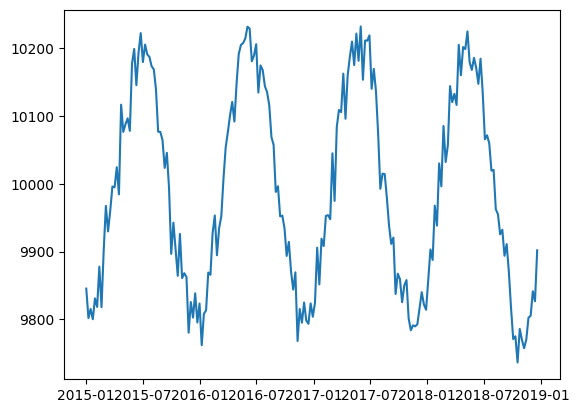

In [4]:
plt.plot(data)

(array([11., 32., 22., 22., 18., 17., 16., 15., 28., 27.]),
 array([ 9736.56809336,  9786.10331304,  9835.63853272,  9885.17375239,
         9934.70897207,  9984.24419174, 10033.77941142, 10083.3146311 ,
        10132.84985077, 10182.38507045, 10231.92029012]),
 <BarContainer object of 10 artists>)

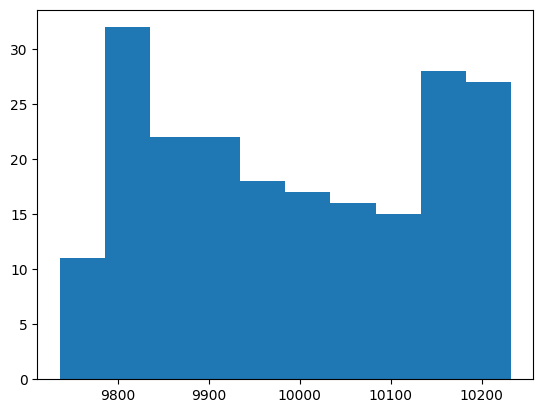

In [5]:
plt.hist(data)

In [6]:
data.describe()

count      208.000000
mean      9991.662622
std        147.454552
min       9736.568093
25%       9857.993373
50%       9977.061598
75%      10135.459726
max      10231.920290
Name: demandas, dtype: float64

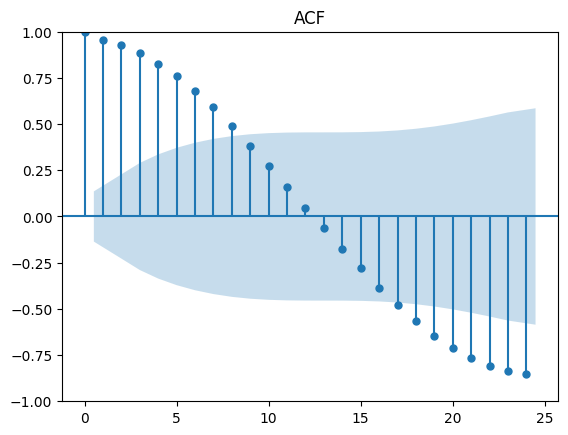

In [7]:
plot_acf(data,title='ACF')
plt.show()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


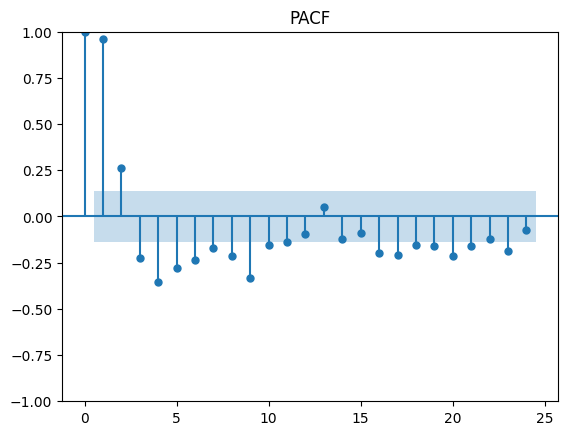

In [8]:
plot_pacf(data,title='PACF')
plt.show()

In [9]:
decom = seasonal_decompose(data)

<AxesSubplot: xlabel='date'>

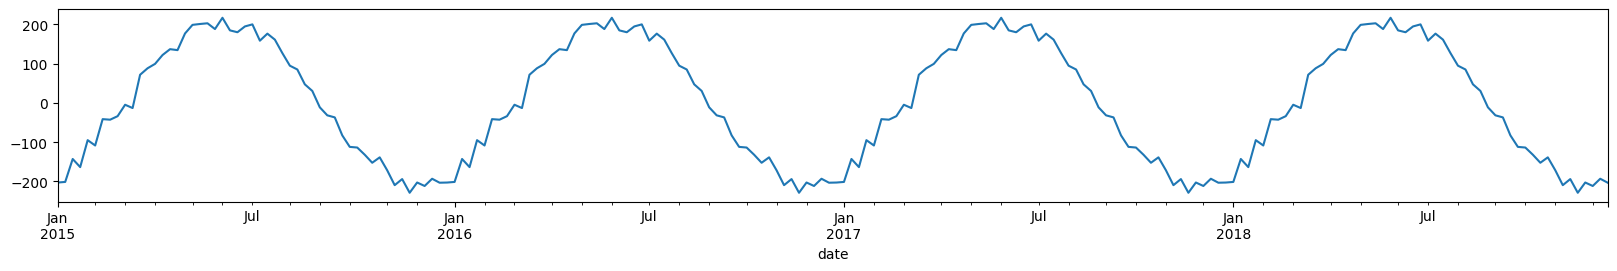

In [10]:
decom.seasonal.plot(figsize=(20,2.5))

<AxesSubplot: xlabel='date'>

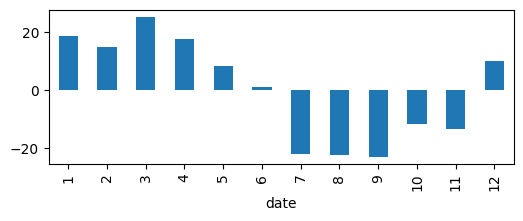

In [11]:
fig=plt.figure(figsize=(6,2))
data.diff().groupby(data.index.month).mean().plot(kind='bar')

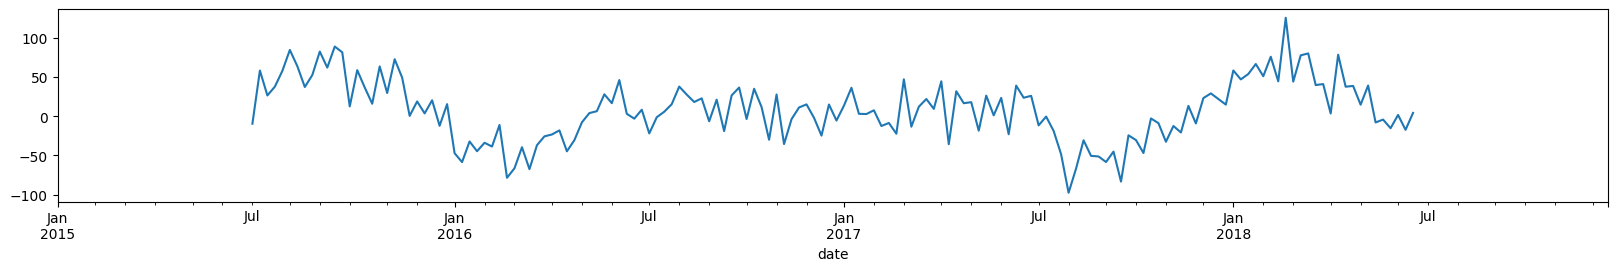

In [12]:
decom.resid.plot(figsize=(20,2.5));

<AxesSubplot: xlabel='date'>

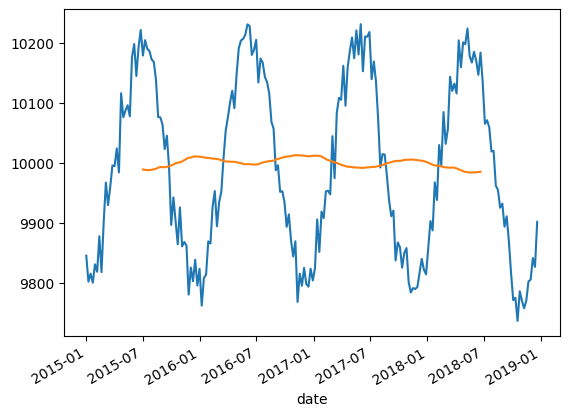

In [13]:
plt.plot(data)
decom.trend.plot()

$\hat{d}_{i} = \frac{d_{i-1}+d_{i-2}}{2}$

In [18]:
media_movel = data.rolling(4).mean()

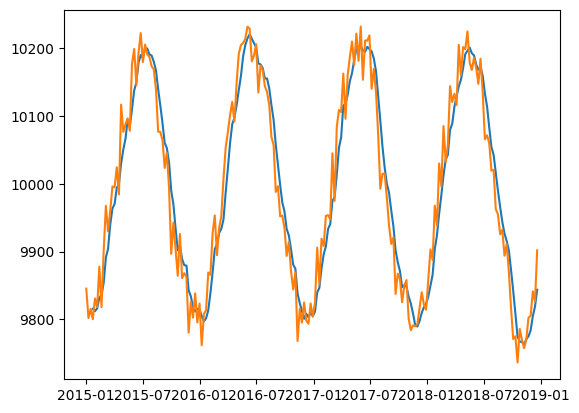

In [19]:
plt.plot(media_movel)
plt.plot(data)